In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
general_selection = 'all_variables_dataset.csv'
general_df = pd.read_csv(general_selection)

In [3]:
general_df

,Nanoparticle Size (nm),Nanoparticle Material,Surface Area (m²/g),Surface Charge (mV),Release Mechanism Type,Stability (days),Patient Age (years),Patient Gender,Patient Weight (kg),Patient BMI (kg/m²),Pre-Existing Conditions,Chronic Disease,Liver Function Index (ALT/AST),Renal Function Index (GFR),Systolic Blood Pressure (mmHg),Diastolic Blood Pressure (mmHg),Heart Rate (bpm)
0,107.450712,polymer,87.772889,-12.802911,burst,15,78,Female,67.649044,23.407974,No,NaN,38.885989,71.713281,117,107,61.415501
1,97.926035,polymer,103.432747,-13.016033,sustained,6,52,Male,85.936023,29.735648,Yes,Diabetes,37.344490,91.765818,92,68,81.255878
2,109.715328,lipid,99.656119,0.508426,sustained,13,67,Male,40.000000,15.000000,No,NaN,19.611982,104.738602,173,67,67.270246
3,122.845448,lipid,88.961809,-4.886401,sustained,6,79,Female,73.527997,25.442214,No,Diabetes,35.029004,99.845413,159,111,62.224610
4,96.487699,lipid,79.763517,-21.458568,sustained,25,34,Male,52.666479,18.223695,No,Diabetes,33.262747,102.507110,116,104,77.286848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,105.779761,lipid,101.523605,1.759567,sustained,27,50,Female,101.767839,35.213785,Yes,Diabetes,43.684220,107.356446,140,76,79.578822
196,86.742138,metal,147.311035,-13.396285,controlled,21,58,Male,52.410951,18.135277,No,Hypertension,41.881457,107.642627,136,82,77.792739
197,102.305877,lipid,110.193540,1.488902,burst,13,25,Male,51.497978,17.819370,Yes,Diabetes,35.367436,63.990247,93,83,67.094249
198,100.873131,metal,72.384907,-10.602583,sustained,7,28,Female,80.424969,27.828709,Yes,Hypertension,37.653902,93.100861,96,109,84.110509


In [4]:
regression_selection = 'best_options.csv'

In [5]:
df = pd.read_csv(regression_selection)

In [6]:
df

,Drug Encapsulation Efficiency (%),Clearance Rate (L/hr),Targeting Precision (%),Volume of Distribution (L),Blood Flow Rate (mL/min),Drug Efficacy (%)
0,50.993428,1.035779,46.811145,2.075699,51.876568,38.541807
1,49.974728,1.076179,49.052506,1.947984,49.721679,37.865292
2,51.797890,1.148506,50.513000,2.167363,51.699779,38.288647
3,53.799829,1.165682,50.847730,2.256167,51.336756,38.632137
4,50.536718,0.942635,50.104894,2.202148,52.146083,38.343763
...,...,...,...,...,...,...
195,99.765610,4.872680,97.974942,9.944511,196.422724,78.297515
196,97.478516,4.768385,98.706481,9.875441,201.334067,77.130972
197,99.804938,5.095186,97.539960,9.987748,199.774148,78.402840
198,99.865161,4.968446,98.860157,9.962631,198.103873,78.345760


In [7]:
dependent_variable = [float(val) for val in range(1, 201)]
print(dependent_variable)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 1

In [8]:
array_of_independent_variables = [column for column in df.columns]
print(array_of_independent_variables)

['Drug Encapsulation Efficiency (%)', 'Clearance Rate (L/hr)', 'Targeting Precision (%)', 'Volume of Distribution (L)', 'Blood Flow Rate (mL/min)', 'Drug Efficacy (%)']


In [9]:
starting_point = 0
independent_variable = list((round(df[array_of_independent_variables[starting_point]])))
print(independent_variable)

[51.0, 50.0, 52.0, 54.0, 51.0, 51.0, 55.0, 53.0, 51.0, 53.0, 52.0, 52.0, 53.0, 49.0, 50.0, 53.0, 52.0, 55.0, 53.0, 52.0, 58.0, 55.0, 56.0, 53.0, 55.0, 57.0, 54.0, 58.0, 56.0, 57.0, 56.0, 61.0, 58.0, 56.0, 60.0, 56.0, 59.0, 55.0, 57.0, 60.0, 62.0, 61.0, 60.0, 60.0, 58.0, 60.0, 61.0, 64.0, 63.0, 59.0, 63.0, 62.0, 62.0, 65.0, 66.0, 66.0, 62.0, 64.0, 65.0, 67.0, 64.0, 65.0, 63.0, 63.0, 68.0, 69.0, 66.0, 69.0, 68.0, 66.0, 68.0, 71.0, 68.0, 71.0, 63.0, 70.0, 69.0, 69.0, 70.0, 66.0, 70.0, 71.0, 74.0, 70.0, 69.0, 70.0, 73.0, 73.0, 71.0, 73.0, 73.0, 75.0, 72.0, 73.0, 73.0, 71.0, 75.0, 75.0, 75.0, 74.0, 72.0, 75.0, 75.0, 74.0, 76.0, 77.0, 80.0, 77.0, 78.0, 77.0, 74.0, 78.0, 78.0, 83.0, 78.0, 79.0, 79.0, 77.0, 82.0, 81.0, 82.0, 79.0, 83.0, 78.0, 82.0, 86.0, 80.0, 81.0, 82.0, 81.0, 80.0, 83.0, 81.0, 84.0, 82.0, 87.0, 83.0, 84.0, 86.0, 82.0, 86.0, 88.0, 82.0, 86.0, 87.0, 88.0, 84.0, 84.0, 88.0, 88.0, 88.0, 89.0, 87.0, 89.0, 89.0, 88.0, 93.0, 90.0, 87.0, 91.0, 88.0, 92.0, 93.0, 89.0, 93.0, 92.0, 93.

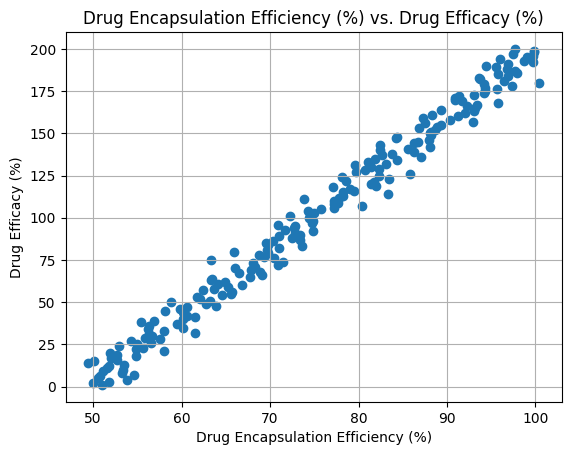

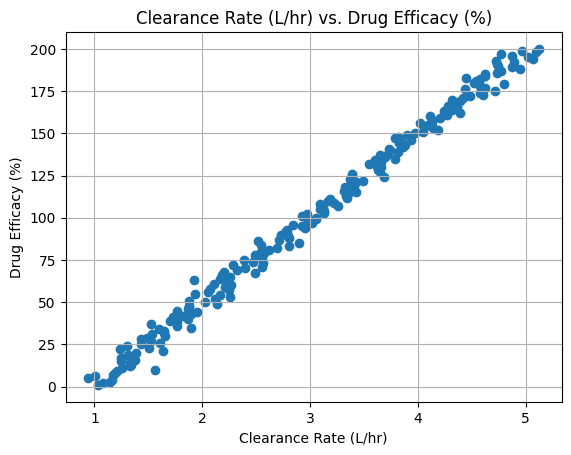

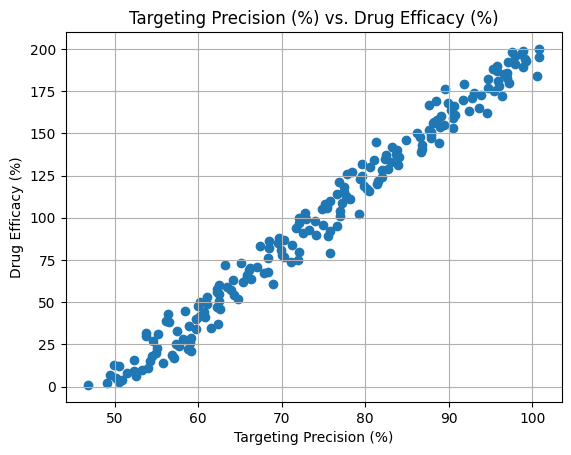

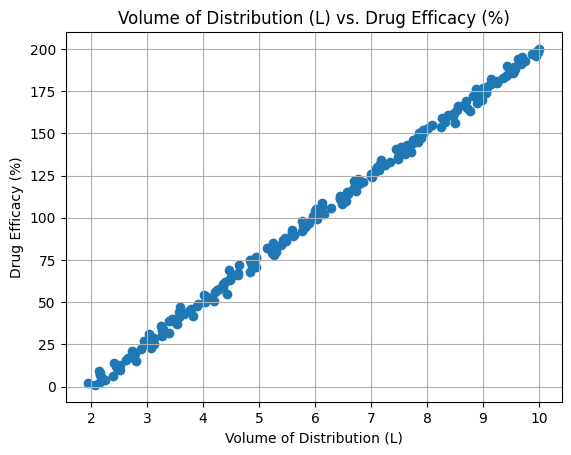

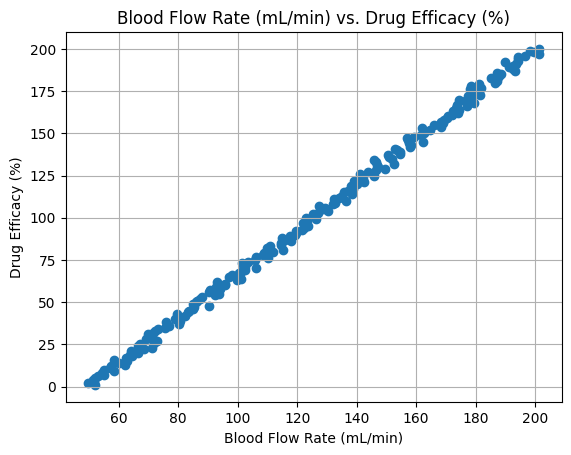

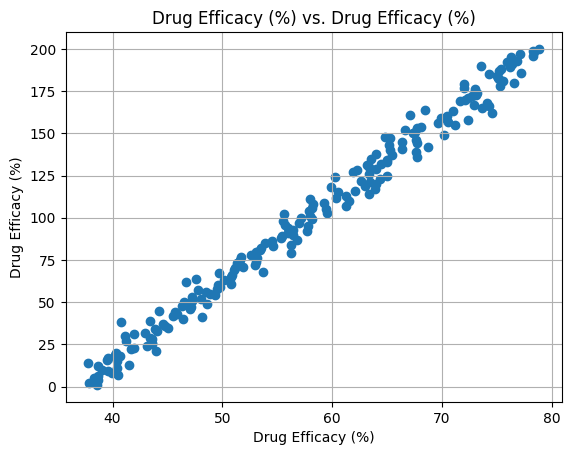

In [10]:
for starting_point in range(len(array_of_independent_variables)):
    independent_variable = df[array_of_independent_variables[starting_point]]
    
    plt.scatter(independent_variable, dependent_variable)
    plt.xlabel(array_of_independent_variables[starting_point])
    plt.ylabel('Drug Efficacy (%)')
    plt.title(f'{array_of_independent_variables[starting_point]} vs. Drug Efficacy (%)')
    plt.grid()  # Optional: Add a grid for better visualization
    plt.show()

In [15]:
# Perform linear regression on the first independent variable
slope, intercept, r_value, p_value, std_err = linregress(independent_variable, dependent_variable)

def y_predictor(x: int):
    return slope * x + intercept

# Initialize a list to store predicted values for each independent variable
y_hut_arrays = []

# Generate predictions for each independent variable
for i in range(len(array_of_independent_variables)):
    predicted_values = list(map(y_predictor, df[array_of_independent_variables[i]]))
    y_hut_arrays.append(predicted_values)
    print(slope, intercept, r_value, p_value, std_err)

# Now you can access the predicted values for each variable
print(y_hut_arrays)

4.774507907442923 -176.02623173651506 0.9937982630215272 7.638266746167408e-191 0.03796601953424267
4.774507907442923 -176.02623173651506 0.9937982630215272 7.638266746167408e-191 0.03796601953424267
4.774507907442923 -176.02623173651506 0.9937982630215272 7.638266746167408e-191 0.03796601953424267
4.774507907442923 -176.02623173651506 0.9937982630215272 7.638266746167408e-191 0.03796601953424267
4.774507907442923 -176.02623173651506 0.9937982630215272 7.638266746167408e-191 0.03796601953424267
4.774507907442923 -176.02623173651506 0.9937982630215272 7.638266746167408e-191 0.03796601953424267
[[67.44229493821302, 62.578500739485946, 71.2832019338201, 80.84147512813246, 65.26172976677947, 66.46151164273712, 84.97684240021715, 78.424785717813, 67.81314611863519, 78.67670399371201, 70.27023178179292, 71.44777897942436, 79.405166421892, 60.02434665192885, 63.022647406801866, 75.32424766198486, 72.22162488771062, 86.09354312470322, 75.62167922088864, 72.0059302012379, 100.68716895658287, 85

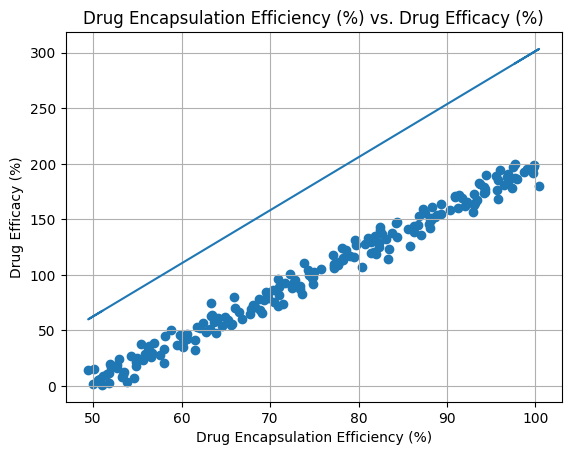

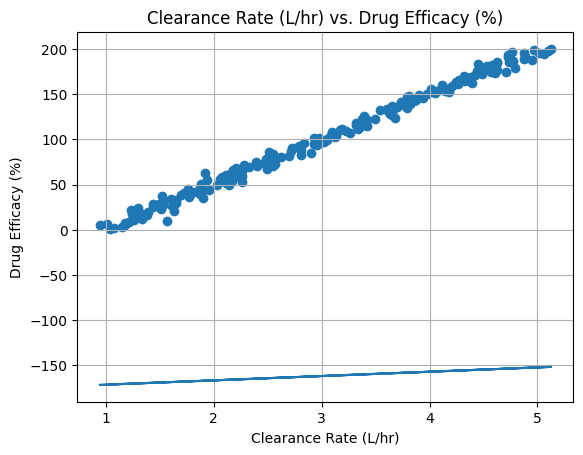

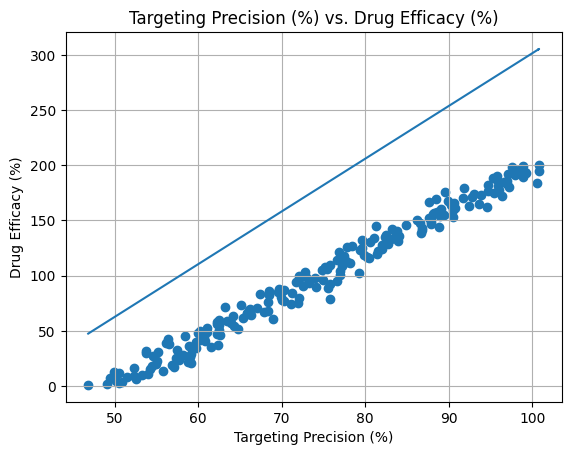

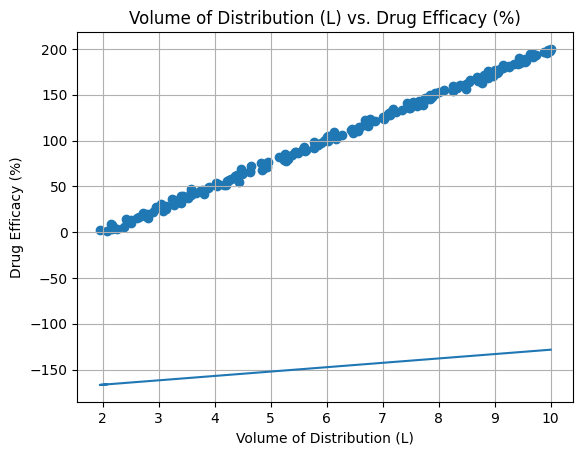

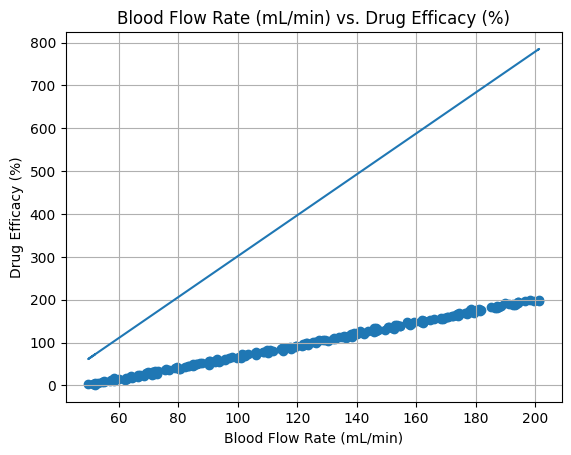

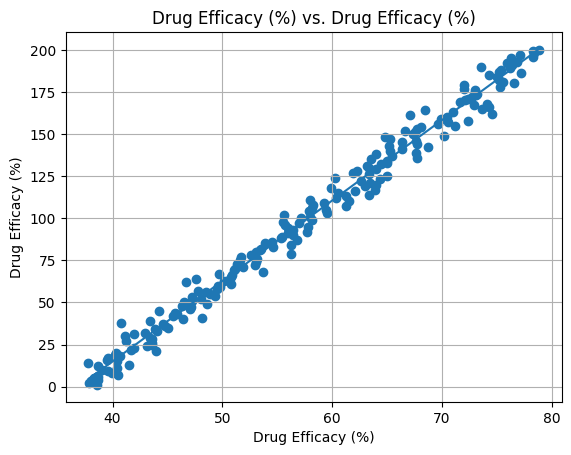

In [14]:
for starting_point in range(len(array_of_independent_variables)):
    independent_variable = df[array_of_independent_variables[starting_point]]
    plt.title(f'{array_of_independent_variables[starting_point]} vs. Drug Efficacy (%)')
    # Scatter plot
    plt.scatter(independent_variable, dependent_variable)
    plt.xlabel(array_of_independent_variables[starting_point])
    plt.ylabel('Drug Efficacy (%)')
    # Line of best fit
    plt.plot(independent_variable, y_hut_arrays[starting_point])
    plt.grid()  
    plt.show()